In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset
# Set random seed for reproducibility
torch.manual_seed(42)

import numpy as np
from collections import Counter

# Training NN without clients


In [ ]:


# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # Input size: 28*28, Output size: 128
        self.fc2 = nn.Linear(128, 64)      # Input size: 128, Output size: 64
        self.fc3 = nn.Linear(64, 10)       # Input size: 64, Output size: 10

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer


# Evaluate the model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
    accuracy = correct_predictions / total_predictions
    average_loss = total_loss / total_predictions
    print(f"Accuracy: {accuracy:.4f}, Average Loss: {average_loss:.4f}")
    return accuracy, average_loss

# Train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    losses = []
    accuracies = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
        accu, avg_loss = evaluate_model(model, testloader, criterion)
        losses.append(avg_loss)
        accuracies.append(accu)
    return losses, accuracies


model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses, accuracies = train_model(model, trainloader, criterion, optimizer)

evaluate_model(model, testloader, criterion)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6045876.80it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160338.23it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1511338.58it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2810641.60it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Loss: 0.3906
Accuracy: 0.9265, Average Loss: 0.2556
Epoch 2/5, Loss: 0.1927
Accuracy: 0.9558, Average Loss: 0.1499
Epoch 3/5, Loss: 0.1356
Accuracy: 0.9627, Average Loss: 0.1193
Epoch 4/5, Loss: 0.1091
Accuracy: 0.9623, Average Loss: 0.1151
Epoch 5/5, Loss: 0.0929
Accuracy: 0.9638, Average Loss: 0.1183
Accuracy: 0.9638, Average Loss: 0.1183


(0.9638, 0.11825472501181065)

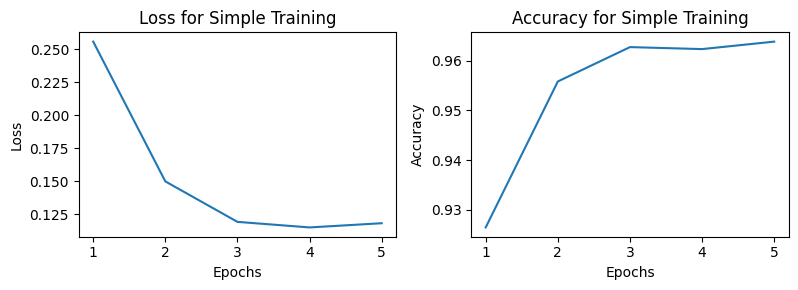

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], losses)
ax[0].set_title("Loss for Simple Training")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], accuracies)
ax[1].set_title("Accuracy for Simple Training")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

In [ ]:
c = 100 # Number of clients

# Federated Learning Algorithms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
# Define function to split MNIST dataset into subsets with similar class distributions
def split_dataset_with_similar_class_distribution(dataset, num_subsets=10):
    # Initialize dictionaries to store images and labels for each class
    class_images = {i: [] for i in range(10)}
    class_labels = {i: [] for i in range(10)}

    # Iterate through the dataset and store images and labels for each class

    for image, label in dataset:
        class_images[label].append(image)
        class_labels[label].append(label)

    # Initialize lists to store images and labels for each subset
    subset_images = [[] for _ in range(num_subsets)]
    subset_labels = [[] for _ in range(num_subsets)]

    # Calculate the number of images for each class in each subset
    num_images_per_class_per_subset = len(dataset) // (10 * num_subsets)

    # Iterate through each class and distribute images evenly across subsets
    for i in range(10):
        images = class_images[i]
        labels = class_labels[i]
        random.shuffle(images)
#         print(labels)
#         return
        for j in range(num_subsets):
            subset_images[j].extend(images[j*num_images_per_class_per_subset:(j+1)*num_images_per_class_per_subset])
            subset_labels[j].extend(labels[j*num_images_per_class_per_subset:(j+1)*num_images_per_class_per_subset])

    # Convert lists of images and labels to PyTorch tensors

    subset_datasets = [TensorDataset(torch.cat(subset_images[i]), torch.tensor(subset_labels[i], dtype = torch.long)) for i in range(num_subsets)]

    return subset_datasets

# Split the MNIST training dataset into 10 subsets with similar class distributions
train_subsets = split_dataset_with_similar_class_distribution(train_dataset, num_subsets = c)


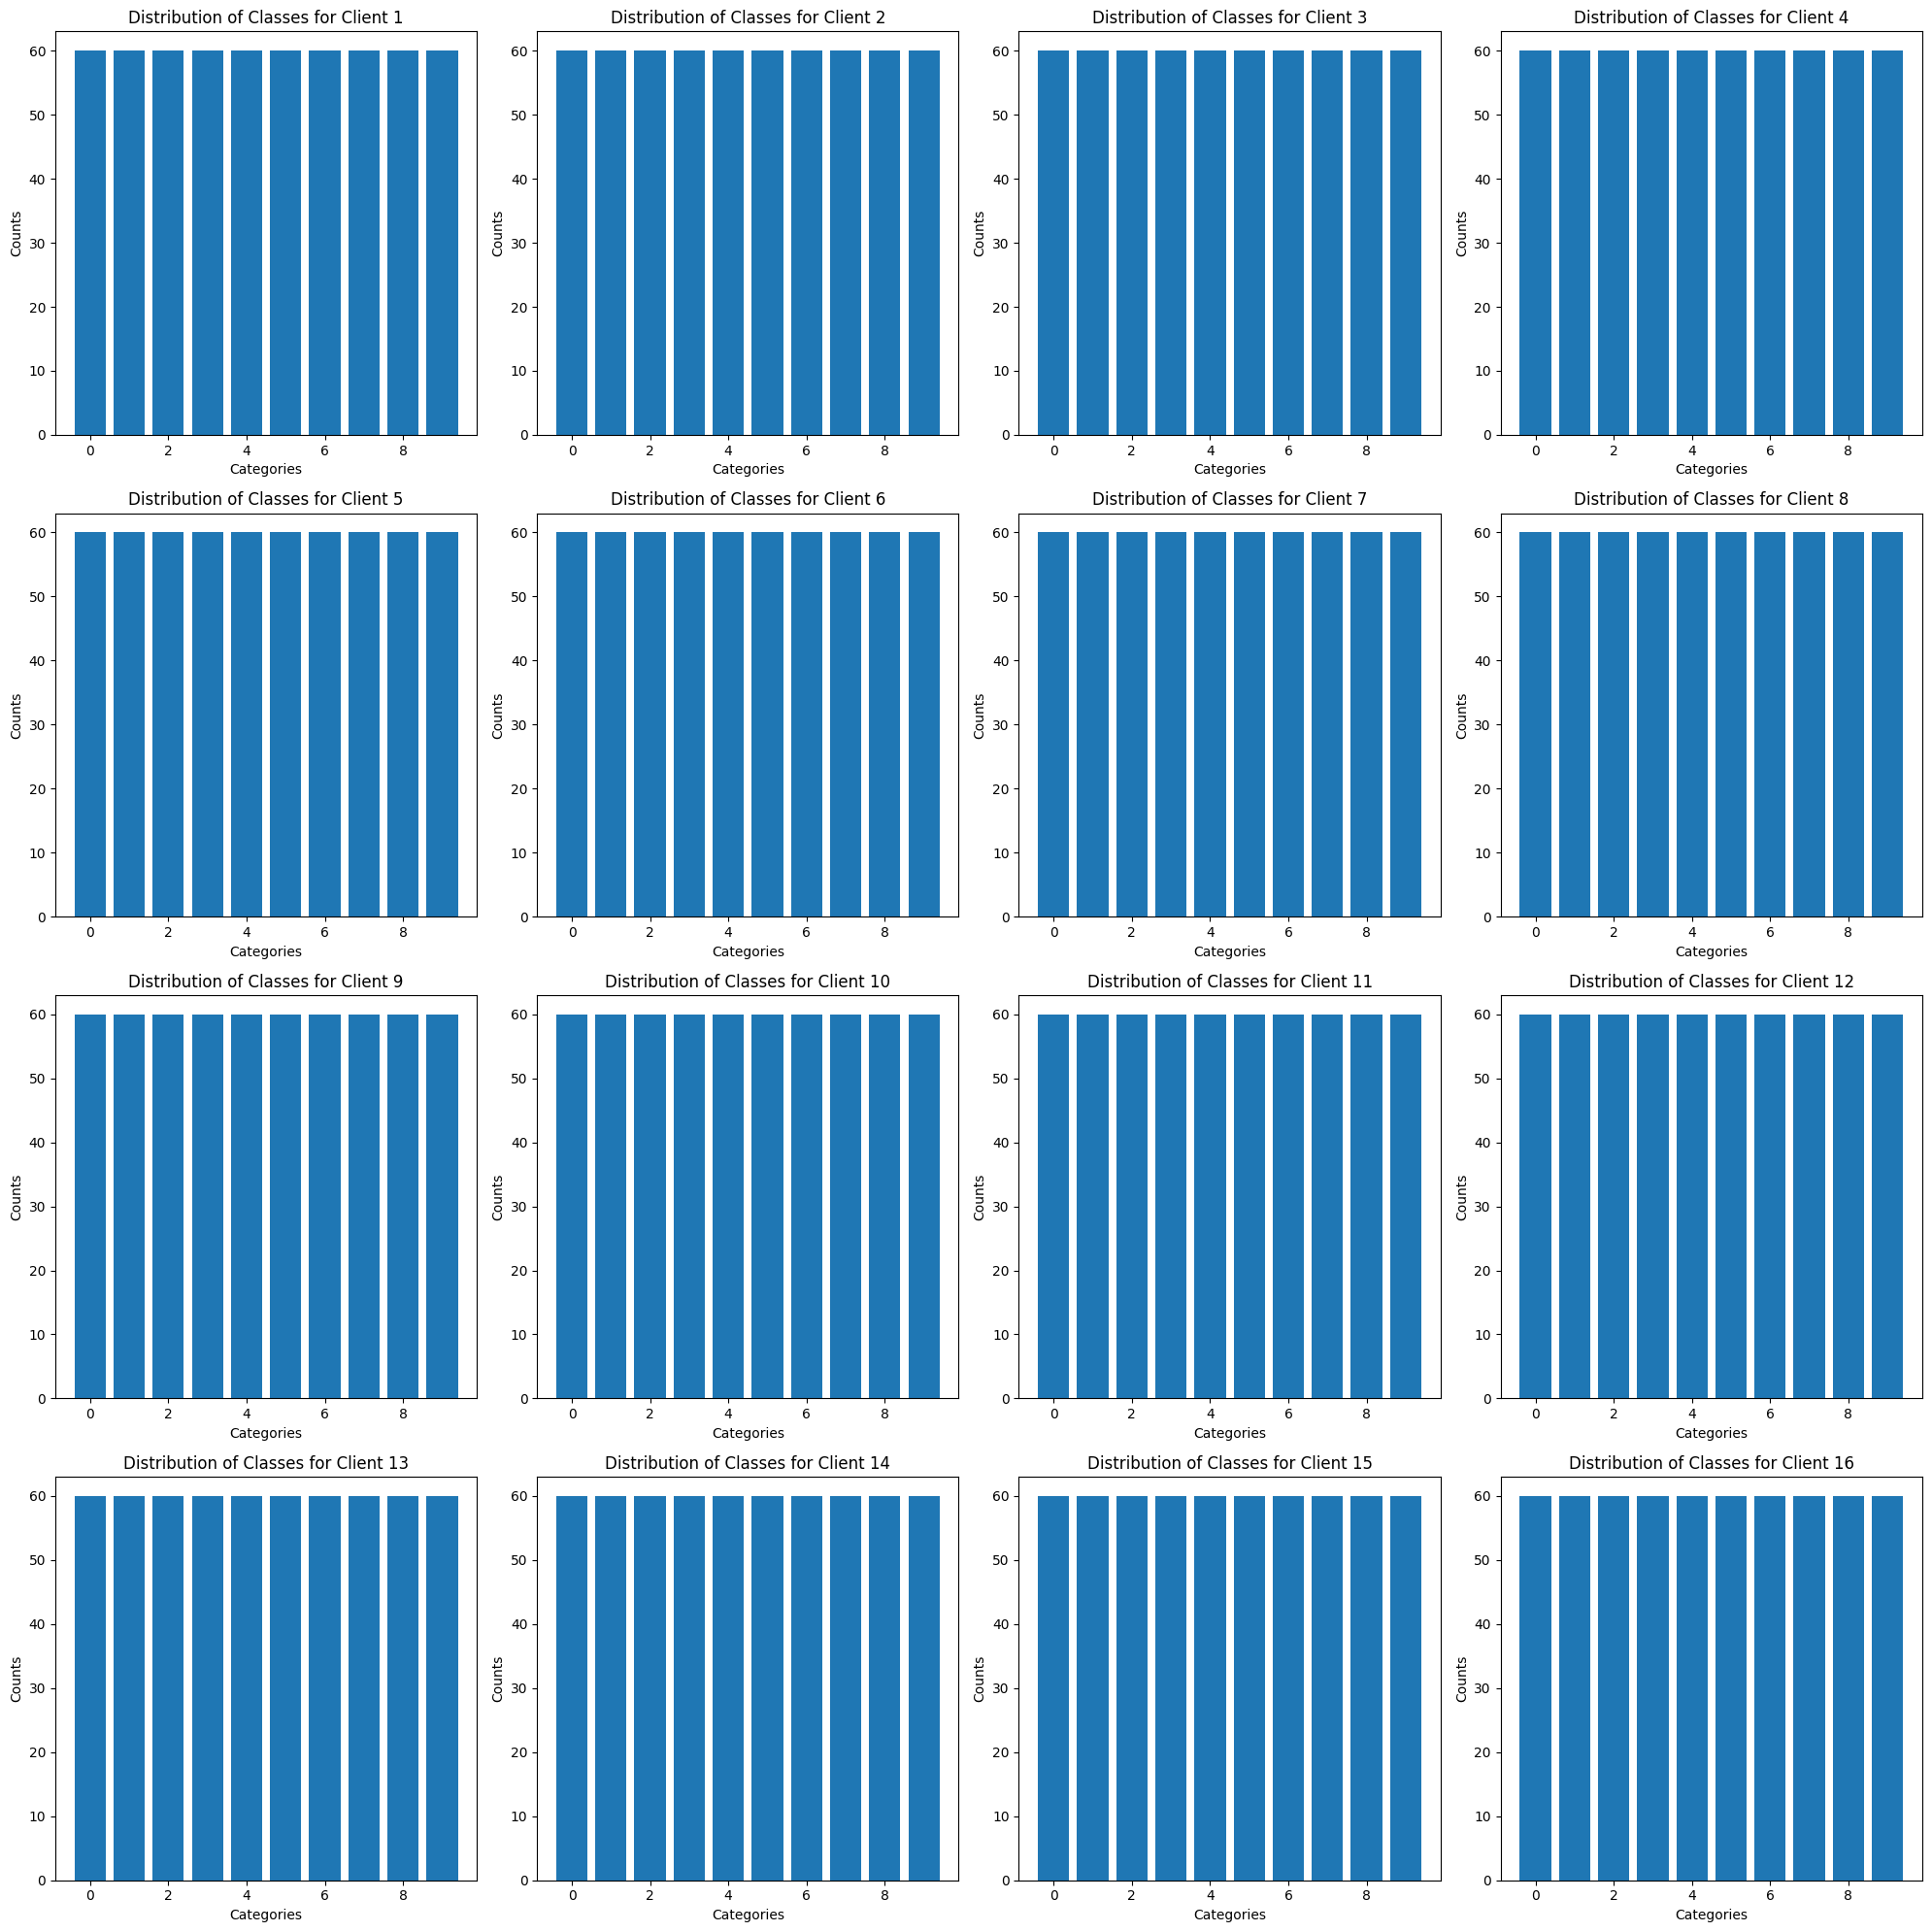

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (20, 20))

for i, dataset in enumerate(train_subsets):
    if i >= 16:
        break
    class_counts = {}
    for _, label in dataset:
        if label.item() not in class_counts:
            class_counts[label.item()] = 0
        class_counts[label.item()] += 1
#     print(f"Subset {i+1}: {class_counts}")
    keys = sorted(class_counts)
    values = [class_counts[k] for k in keys]
    ax.flatten()[i].bar(keys, values)
    ax.flatten()[i].set_xlabel('Categories')
    ax.flatten()[i].set_ylabel('Counts')
    ax.flatten()[i].set_title(f'Distribution of Classes for Client {i+1}')

#     break
plt.tight_layout()

In [ ]:
client_loaders = []
for dataset in train_subsets:
    loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
    client_loaders.append(loader)

In [ ]:


def create_non_iid_dataset(dataset, num_clients=10, max_samples_per_client=1000, class_imbalance_factor=0.8):
    # Shuffle the dataset
    shuffled_indices = np.random.permutation(len(dataset))
    dataset = [dataset[i] for i in shuffled_indices]

    # Calculate class distribution in the entire dataset
    all_labels = [label for _, label in dataset]
    class_distribution = Counter(all_labels)

    # Initialize lists to store data for each client
    client_data = [[] for _ in range(num_clients)]

    # Assign data to each client based on non-IID distribution
    for label, count in class_distribution.items():
        # Generate non-IID distribution for this class
        class_indices = [index for index, (_, l) in enumerate(dataset) if l == label]
        np.random.shuffle(class_indices)

        # Divide the data of this class among clients with varying sample sizes
        current_index = 0
        for client_index in range(num_clients):
            # Calculate the number of samples for this client
            num_samples = min(np.random.randint(1, max_samples_per_client + 1), int(count * class_imbalance_factor))
            client_data[client_index].extend(dataset[i] for i in class_indices[current_index:current_index + num_samples])
            current_index += num_samples

    return client_data

# Example usage:
# Assuming you have the original MNIST dataset 'train_dataset'
non_iid_dataset = create_non_iid_dataset(train_dataset, num_clients=c, max_samples_per_client = 100, class_imbalance_factor=1)


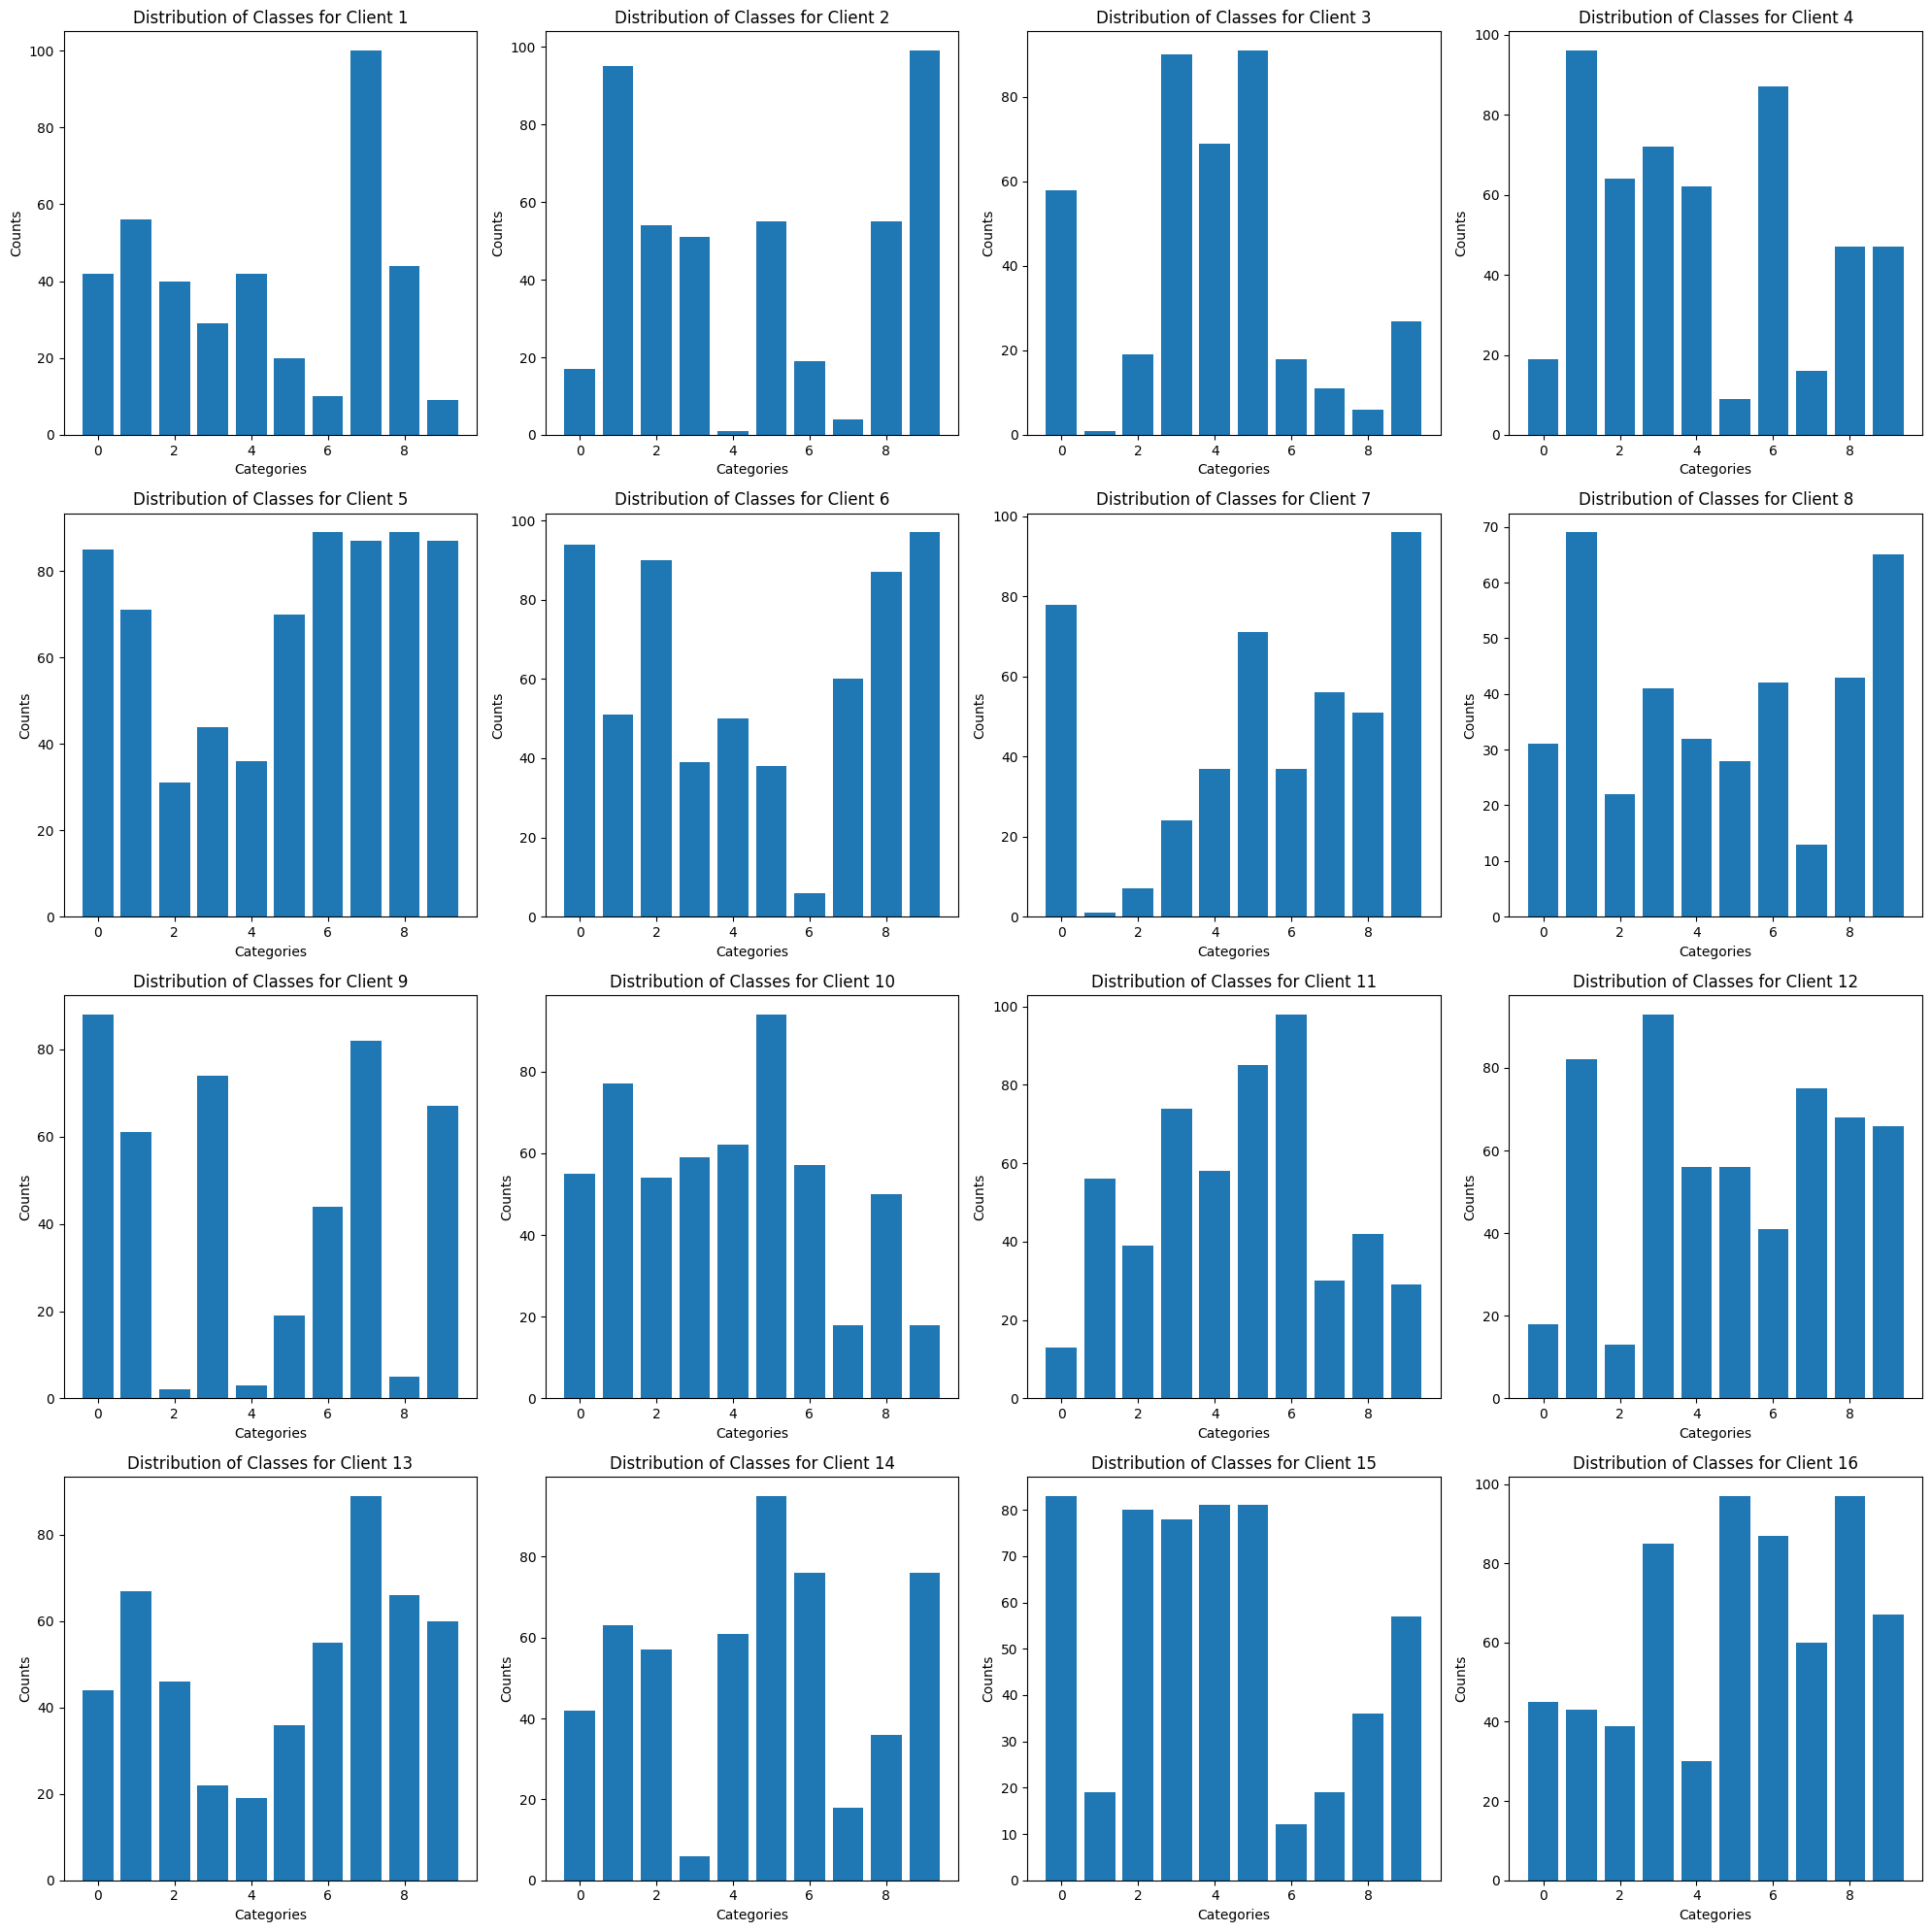

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (20, 20))
for i, dataset in enumerate(non_iid_dataset):
    if i >= 16:
        break
    class_counts = {}
    for _, label in dataset:
        if label not in class_counts:
            class_counts[label] = 0
        class_counts[label] += 1
#     print(f"Subset {i+1}: {class_counts}")
    keys = sorted(class_counts)
    values = [class_counts[k] for k in keys]
    ax.flatten()[i].bar(keys, values)
    ax.flatten()[i].set_xlabel('Categories')
    ax.flatten()[i].set_ylabel('Counts')
    ax.flatten()[i].set_title(f'Distribution of Classes for Client {i+1}')
plt.tight_layout()

In [ ]:
client_loaders_non_iid = []
for dataset in non_iid_dataset:
    loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
    client_loaders_non_iid.append(loader)

# Stochastic Federated Learning

In [ ]:

# Initialize global model
global_model_sgd = SimpleNN()
criterion = nn.CrossEntropyLoss()
# Federated learning parameters
num_clients = c
num_epochs = 5
max_clients_per_epoch = c  # Maximum number of clients to select randomly for each epoch
client_learning_rate = 0.001
sgd_losses = []
sgd_accu = []
# Training loop
for epoch in range(num_epochs):
    print(f"Round {epoch + 1}/{num_epochs}")

    # Randomly select number of clients for this epoch
    num_selected_clients = random.randint(1, max_clients_per_epoch)

    # Randomly select clients for this epoch
    selected_clients = random.sample(range(num_clients), num_selected_clients)

    # Initialize variables to accumulate weighted parameters and total number of samples
    weighted_params_sum = [torch.zeros_like(param.data) for param in global_model_sgd.parameters()]
    total_samples = 0

    # Iterate over selected clients
    for client_id in selected_clients:
        # Get the number of samples in this client's dataset
        num_samples = len(client_loaders[client_id].dataset)
        total_samples += num_samples

        # Create local model for the client
        local_model = SimpleNN()
        local_model.load_state_dict(global_model_sgd.state_dict())  # Initialize local model with global model parameters

        # Define optimizer for this client
        optimizer = optim.Adam(local_model.parameters(), lr=client_learning_rate)

        # Train the client model
        for _ in range(1):  # Each client has 1 local epochs
            for inputs, labels in client_loaders[client_id]:
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Aggregate weighted parameters
        j = 0
        for global_param, local_param in zip(global_model_sgd.parameters(), local_model.parameters()):
            weighted_params_sum[j].data += (local_param.data * num_samples)  # Accumulate gradients
            j += 1
    # Update global model using federated averaging

    with torch.no_grad():
        for global_param, weighted_param_sum in zip(global_model_sgd.parameters(), weighted_params_sum):
            global_param.data = weighted_param_sum / (total_samples) # Update model parameters

#     evaluate_model(global_model)
    accu, loss = evaluate_model(global_model_sgd, testloader, criterion)
    sgd_losses.append(loss)
    sgd_accu.append(accu)
print('Finished Training')




Round 1/5
Accuracy: 0.4924, Average Loss: 1.9585
Round 2/5
Accuracy: 0.7492, Average Loss: 1.1458
Round 3/5
Accuracy: 0.8063, Average Loss: 0.7874
Round 4/5
Accuracy: 0.8299, Average Loss: 0.6280
Round 5/5
Accuracy: 0.8573, Average Loss: 0.5311
Finished Training


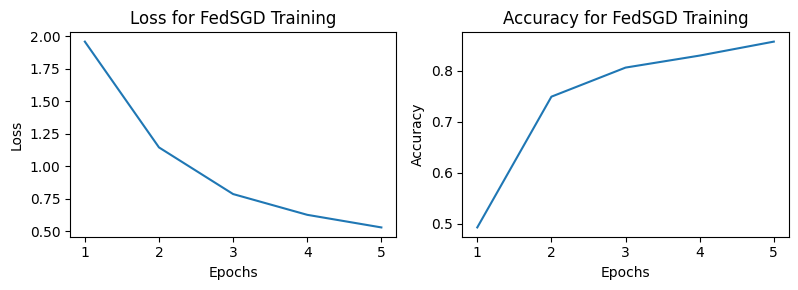

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], sgd_losses)
ax[0].set_title("Loss for FedSGD Training")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], sgd_accu)
ax[1].set_title("Accuracy for FedSGD Training")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

In [ ]:

# Initialize global model
global_model_sgd_2 = SimpleNN()
criterion = nn.CrossEntropyLoss()
# Federated learning parameters
num_clients = c
num_epochs = 5
max_clients_per_epoch = c  # Maximum number of clients to select randomly for each epoch
client_learning_rate = 0.001
sgd_2_losses = []
sgd_2_accu = []
# Training loop
for epoch in range(num_epochs):
    print(f"Round {epoch + 1}/{num_epochs}")

    # Randomly select number of clients for this epoch
    num_selected_clients = random.randint(1, max_clients_per_epoch)

    # Randomly select clients for this epoch
    selected_clients = random.sample(range(num_clients), num_selected_clients)

    # Initialize variables to accumulate weighted parameters and total number of samples
    weighted_params_sum = [torch.zeros_like(param.data) for param in global_model_sgd_2.parameters()]
    total_samples = 0

    # Iterate over selected clients
    for client_id in selected_clients:
        # Get the number of samples in this client's dataset
        num_samples = len(non_iid_dataset[client_id])
        total_samples += num_samples

        # Create local model for the client
        local_model = SimpleNN()
        local_model.load_state_dict(global_model_sgd_2.state_dict())  # Initialize local model with global model parameters

        # Define optimizer for this client
        optimizer = optim.Adam(local_model.parameters(), lr=client_learning_rate)

        # Train the client model
        for _ in range(1):  # Each client has 1 local epochs
            for inputs, labels in client_loaders[client_id]:
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Aggregate weighted parameters
        j = 0
        for global_param, local_param in zip(global_model_sgd_2.parameters(), local_model.parameters()):
            weighted_params_sum[j].data += (local_param.data * num_samples)  # Accumulate gradients
            j += 1
    # Update global model using federated averaging

    with torch.no_grad():
        for global_param, weighted_param_sum in zip(global_model_sgd_2.parameters(), weighted_params_sum):
            global_param.data = weighted_param_sum / (total_samples) # Update model parameters

#     evaluate_model(global_model)
    accu, loss = evaluate_model(global_model_sgd_2, testloader, criterion)
    sgd_2_losses.append(loss)
    sgd_2_accu.append(accu)
print('Finished Training')




Round 1/5
Accuracy: 0.5349, Average Loss: 1.9920
Round 2/5
Accuracy: 0.7266, Average Loss: 1.2476
Round 3/5
Accuracy: 0.7994, Average Loss: 0.8125
Round 4/5
Accuracy: 0.8216, Average Loss: 0.6383
Round 5/5
Accuracy: 0.8513, Average Loss: 0.5421
Finished Training


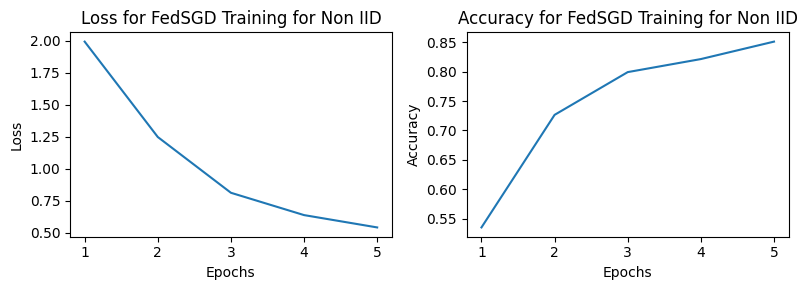

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], sgd_2_losses)
ax[0].set_title("Loss for FedSGD Training for Non IID")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], sgd_2_accu)
ax[1].set_title("Accuracy for FedSGD Training for Non IID")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

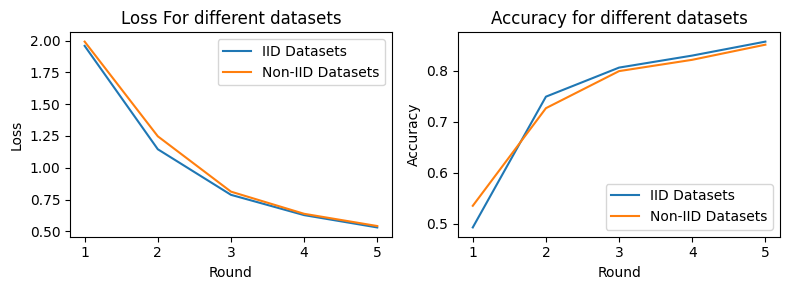

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], sgd_losses, label = "IID Datasets")
ax[0].plot([i for i in range(1, 6)], sgd_2_losses, label = "Non-IID Datasets")
ax[0].set_title("Loss For different datasets")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], sgd_accu, label = "IID Datasets")
ax[1].plot([i for i in range(1, 6)], sgd_2_accu, label = "Non-IID Datasets")
ax[1].set_title("Accuracy for different datasets")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[0].legend()

plt.tight_layout()

# Federated Average

In [ ]:

# Initialize global model
global_model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
import random

# Federated learning parameters
num_clients = c
num_epochs = 5
max_clients_per_epoch = c  # Maximum number of clients to select randomly for each epoch
client_learning_rate = 0.001
fed_losses = []
fed_accu = []
# Training loop
for epoch in range(num_epochs):
    print(f"Round {epoch + 1}/{num_epochs}")

    # Randomly select number of clients for this epoch
    num_selected_clients = random.randint(1, max_clients_per_epoch)

    # Randomly select clients for this epoch
    selected_clients = random.sample(range(num_clients), num_selected_clients)

    # Initialize variables to accumulate weighted parameters and total number of samples
    weighted_params_sum = [torch.zeros_like(param.data) for param in global_model.parameters()]
    total_samples = 0

    # Iterate over selected clients
    for client_id in selected_clients:
        # Get the number of samples in this client's dataset
        num_samples = len(client_loaders[client_id].dataset)
        total_samples += num_samples

        # Create local model for the client
        local_model = SimpleNN()
        local_model.load_state_dict(global_model.state_dict())  # Initialize local model with global model parameters

        # Define optimizer for this client
        optimizer = optim.Adam(local_model.parameters(), lr=client_learning_rate)

        # Train the client model
        for _ in range(3):  # Each client has 5 local epochs
            for inputs, labels in client_loaders[client_id]:
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Aggregate weighted parameters
        j = 0
        for global_param, local_param in zip(global_model.parameters(), local_model.parameters()):
            weighted_params_sum[j].data += (local_param.data * num_samples)  # Accumulate gradients
            j += 1
    # Update global model using federated averaging

    with torch.no_grad():
        for global_param, weighted_param_sum in zip(global_model.parameters(), weighted_params_sum):
            global_param.data = weighted_param_sum / (total_samples) # Update model parameters

#     evaluate_model(global_model)
    accu, loss = evaluate_model(global_model, testloader, criterion)
    fed_losses.append(loss)
    fed_accu.append(accu)
print('Finished Training')




Round 1/5
Accuracy: 0.7416, Average Loss: 0.9926
Round 2/5
Accuracy: 0.8618, Average Loss: 0.4829
Round 3/5
Accuracy: 0.8843, Average Loss: 0.3883
Round 4/5
Accuracy: 0.8963, Average Loss: 0.3479
Round 5/5
Accuracy: 0.9050, Average Loss: 0.3207
Finished Training


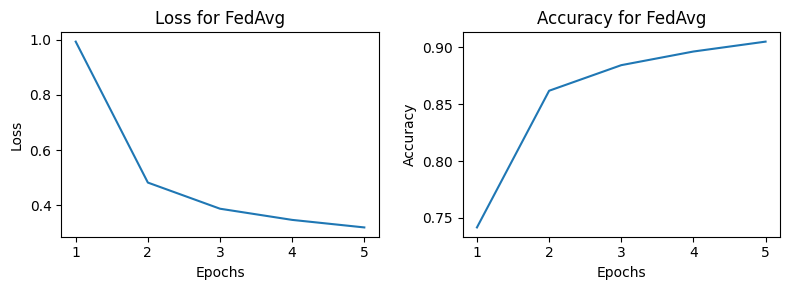

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], fed_losses)
ax[0].set_title("Loss for FedAvg")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], fed_accu)
ax[1].set_title("Accuracy for FedAvg")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

# FedAVG on Non IID Dataset

In [ ]:

# Initialize global model
global_model_4 = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Federated learning parameters
num_clients = c
num_epochs = 5
max_clients_per_epoch = c  # Maximum number of clients to select randomly for each epoch
client_learning_rate = 0.001
fed_2_losses = []
fed_2_accu = []
# Training loop
for epoch in range(num_epochs):
    print(f"Round {epoch + 1}/{num_epochs}")

    # Randomly select number of clients for this epoch
    num_selected_clients = random.randint(1, max_clients_per_epoch)

    # Randomly select clients for this epoch
    selected_clients = random.sample(range(num_clients), num_selected_clients)

    # Initialize variables to accumulate weighted parameters and total number of samples
    weighted_params_sum = [torch.zeros_like(param.data) for param in global_model_4.parameters()]
    total_samples = 0

    # Iterate over selected clients
    for client_id in selected_clients:
        # Get the number of samples in this client's dataset
        num_samples = len(client_loaders_non_iid[client_id].dataset)
        total_samples += num_samples

        # Create local model for the client
        local_model = SimpleNN()
        local_model.load_state_dict(global_model_4.state_dict())  # Initialize local model with global model parameters

        # Define optimizer for this client
        optimizer = optim.Adam(local_model.parameters(), lr=client_learning_rate)

        # Train the client model
        for _ in range(3):  # Each client has 3 local epochs
            for inputs, labels in client_loaders_non_iid[client_id]:
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Aggregate weighted parameters
        j = 0
        for global_param, local_param in zip(global_model_4.parameters(), local_model.parameters()):
            weighted_params_sum[j].data += (local_param.data * num_samples)  # Accumulate gradients
            j += 1
    # Update global model using federated averaging

    with torch.no_grad():
        for global_param, weighted_param_sum in zip(global_model_4.parameters(), weighted_params_sum):
            global_param.data = weighted_param_sum / (total_samples) # Update model parameters
#     evaluate_model(global_model)
    accu, loss = evaluate_model(global_model_4, test_loader, criterion)
    fed_2_losses.append(loss)
    fed_2_accu.append(accu)
print('Finished Training')




Round 1/5
Accuracy: 0.6612, Average Loss: 1.5539
Round 2/5
Accuracy: 0.8348, Average Loss: 0.6140
Round 3/5
Accuracy: 0.8810, Average Loss: 0.4357
Round 4/5
Accuracy: 0.8920, Average Loss: 0.3793
Round 5/5
Accuracy: 0.8978, Average Loss: 0.3482
Finished Training


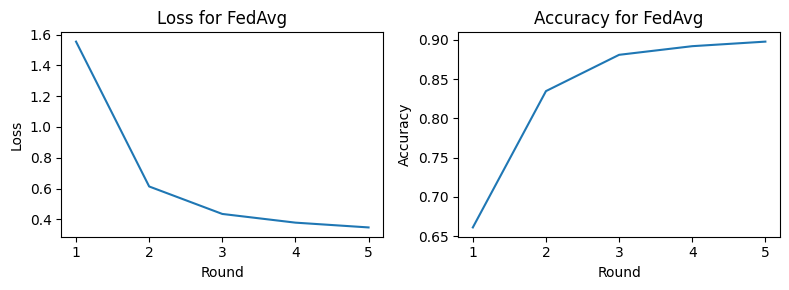

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], fed_2_losses)
ax[0].set_title("Loss for FedAvg")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], fed_2_accu)
ax[1].set_title("Accuracy for FedAvg")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

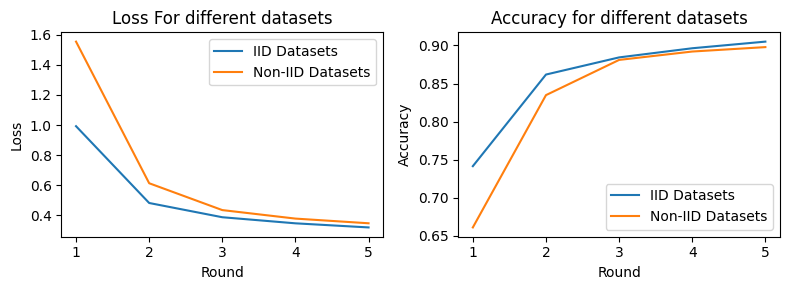

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], fed_losses, label = "IID Datasets")
ax[0].plot([i for i in range(1, 6)], fed_2_losses, label = "Non-IID Datasets")
ax[0].set_title("Loss For different datasets")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], fed_accu, label = "IID Datasets")
ax[1].plot([i for i in range(1, 6)], fed_2_accu, label = "Non-IID Datasets")
ax[1].set_title("Accuracy for different datasets")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[0].legend()

plt.tight_layout()

# **Fed Prox**

In [ ]:
def norm_parameters(model_1, model_2):

    tensor_1=list(model_1.parameters())
    tensor_2=list(model_2.parameters())
    norm=sum([torch.sum((tensor_1[i]-tensor_2[i])**2) for i in range(len(tensor_1))])

    return norm

In [ ]:

# Initialize global model
global_model_5 = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Federated learning parameters
num_clients = c
num_epochs = 5
max_clients_per_epoch = c  # Maximum number of clients to select randomly for each epoch
client_learning_rate = 0.001
mu = 0.4
# Training loop
prox_2_losses = []
prox_2_accu = []
for epoch in range(num_epochs):
    print(f"Round {epoch + 1}/{num_epochs}")

    # Randomly select number of clients for this epoch
    num_selected_clients = random.randint(1, max_clients_per_epoch)

    # Randomly select clients for this epoch
    selected_clients = random.sample(range(num_clients), num_selected_clients)

    # Initialize variables to accumulate weighted parameters and total number of samples
    weighted_params_sum = [torch.zeros_like(param.data) for param in global_model_5.parameters()]
    total_samples = 0

    # Iterate over selected clients
    for client_id in selected_clients:
        # Get the number of samples in this client's dataset
        num_samples = len(client_loaders_non_iid[client_id].dataset)
        total_samples += num_samples

        # Create local model for the client
        local_model = SimpleNN()
        local_model.load_state_dict(global_model_5.state_dict())  # Initialize local model with global model parameters

        # Define optimizer for this client
        optimizer = optim.Adam(local_model.parameters(), lr=client_learning_rate)

        # Train the client model
        for _ in range(3):  # Each client has 5 local epochs
            for inputs, labels in client_loaders_non_iid[client_id]:
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = criterion(outputs, labels)
                loss += mu*norm_parameters(local_model, global_model_5)
                loss.backward()
                optimizer.step()

        # Aggregate weighted parameters
        j = 0
        for global_param, local_param in zip(global_model_5.parameters(), local_model.parameters()):
            weighted_params_sum[j].data += (local_param.data * num_samples)  # Accumulate gradients
            j += 1
    # Update global model using federated averaging
    with torch.no_grad():
        for global_param, weighted_param_sum in zip(global_model_5.parameters(), weighted_params_sum):
            global_param.data = weighted_param_sum / (total_samples) # Update model parameters
#     evaluate_model(global_model)
    accu, loss =  evaluate_model(global_model_5, test_loader, criterion)
    prox_2_losses.append(loss)
    prox_2_accu.append(accu)

print('Finished Training')




Round 1/5
Accuracy: 0.6229, Average Loss: 1.9089
Round 2/5
Accuracy: 0.7728, Average Loss: 1.3069
Round 3/5
Accuracy: 0.8099, Average Loss: 0.9347
Round 4/5
Accuracy: 0.8347, Average Loss: 0.7323
Round 5/5
Accuracy: 0.8428, Average Loss: 0.6187
Finished Training


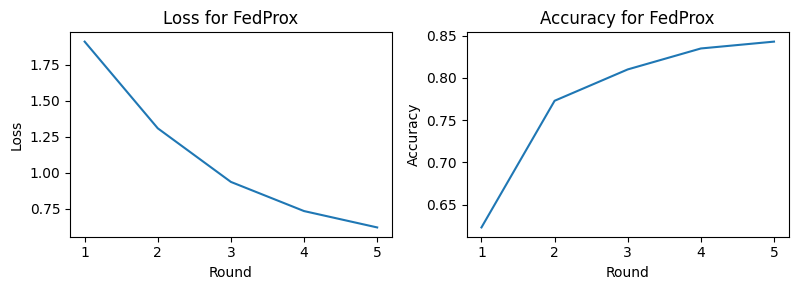

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], prox_2_losses)
ax[0].set_title("Loss for FedProx")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], prox_2_accu)
ax[1].set_title("Accuracy for FedProx")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

IID


In [ ]:

# Initialize global model
global_model_6 = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Federated learning parameters
num_clients = c
num_epochs = 5
max_clients_per_epoch = c  # Maximum number of clients to select randomly for each epoch
client_learning_rate = 0.001
mu = 0.4
# Training loop
prox_losses = []
prox_accu = []
for epoch in range(num_epochs):
    print(f"Round {epoch + 1}/{num_epochs}")

    # Randomly select number of clients for this epoch
    num_selected_clients = random.randint(1, max_clients_per_epoch)

    # Randomly select clients for this epoch
    selected_clients = random.sample(range(num_clients), num_selected_clients)

    # Initialize variables to accumulate weighted parameters and total number of samples
    weighted_params_sum = [torch.zeros_like(param.data) for param in global_model_6.parameters()]
    total_samples = 0

    # Iterate over selected clients
    for client_id in selected_clients:
        # Get the number of samples in this client's dataset
        num_samples = len(client_loaders[client_id].dataset)
        total_samples += num_samples

        # Create local model for the client
        local_model = SimpleNN()
        local_model.load_state_dict(global_model_6.state_dict())  # Initialize local model with global model parameters

        # Define optimizer for this client
        optimizer = optim.Adam(local_model.parameters(), lr=client_learning_rate)

        # Train the client model
        for _ in range(3):  # Each client has 5 local epochs
            for inputs, labels in client_loaders[client_id]:
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = criterion(outputs, labels)
                loss += mu*norm_parameters(local_model, global_model_6)
                loss.backward()
                optimizer.step()

        # Aggregate weighted parameters
        j = 0
        for global_param, local_param in zip(global_model_6.parameters(), local_model.parameters()):
            weighted_params_sum[j].data += (local_param.data * num_samples)  # Accumulate gradients
            j += 1
    # Update global model using federated averaging
    with torch.no_grad():
        for global_param, weighted_param_sum in zip(global_model_6.parameters(), weighted_params_sum):
            global_param.data = weighted_param_sum / (total_samples) # Update model parameters
#     evaluate_model(global_model)
    accu, loss =  evaluate_model(global_model_6, test_loader, criterion)
    prox_losses.append(loss)
    prox_accu.append(accu)


print('Finished Training')




Round 1/5
Accuracy: 0.7155, Average Loss: 1.7686
Round 2/5
Accuracy: 0.7985, Average Loss: 1.1341
Round 3/5
Accuracy: 0.8344, Average Loss: 0.8073
Round 4/5
Accuracy: 0.8398, Average Loss: 0.6600
Round 5/5
Accuracy: 0.8664, Average Loss: 0.5490
Finished Training


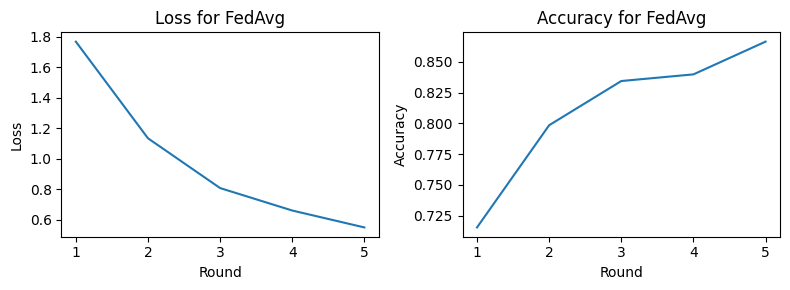

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], prox_losses)
ax[0].set_title("Loss for FedAvg")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], prox_accu)
ax[1].set_title("Accuracy for FedAvg")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()

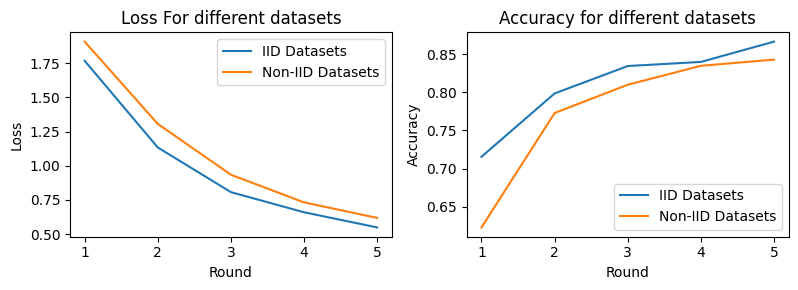

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot([i for i in range(1, 6)], prox_losses, label = "IID Datasets")
ax[0].plot([i for i in range(1, 6)], prox_2_losses, label = "Non-IID Datasets")
ax[0].set_title("Loss For different datasets")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], prox_accu, label = "IID Datasets")
ax[1].plot([i for i in range(1, 6)], prox_2_accu, label = "Non-IID Datasets")
ax[1].set_title("Accuracy for different datasets")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[0].legend()

plt.tight_layout()

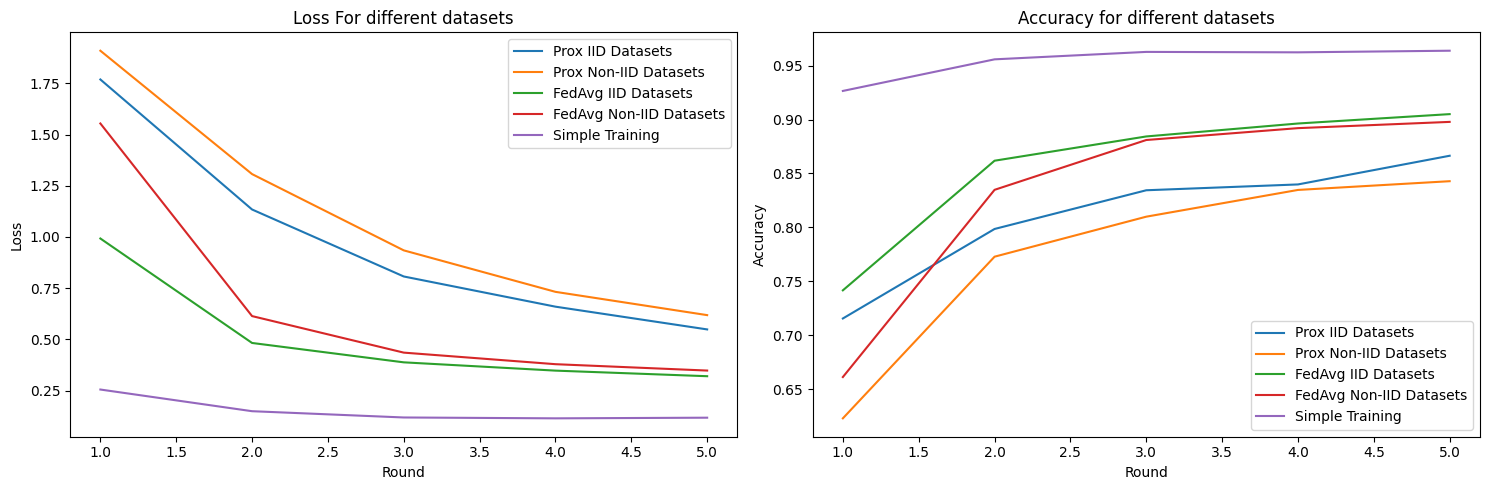

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot([i for i in range(1, 6)], prox_losses, label = "Prox IID Datasets")
ax[0].plot([i for i in range(1, 6)], prox_2_losses, label = "Prox Non-IID Datasets")
ax[0].plot([i for i in range(1, 6)], fed_losses, label = "FedAvg IID Datasets")
ax[0].plot([i for i in range(1, 6)], fed_2_losses, label = "FedAvg Non-IID Datasets")
ax[0].plot([i for i in range(1, 6)], losses, label = "Simple Training")

ax[0].set_title("Loss For different datasets")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

ax[1].plot([i for i in range(1, 6)], prox_accu, label = "Prox IID Datasets")
ax[1].plot([i for i in range(1, 6)], prox_2_accu, label = "Prox Non-IID Datasets")
ax[1].plot([i for i in range(1, 6)], fed_accu, label = "FedAvg IID Datasets")
ax[1].plot([i for i in range(1, 6)], fed_2_accu, label = "FedAvg Non-IID Datasets")
ax[1].plot([i for i in range(1, 6)], accuracies, label = "Simple Training")

ax[1].set_title("Accuracy for different datasets")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[0].legend()
plt.tight_layout()

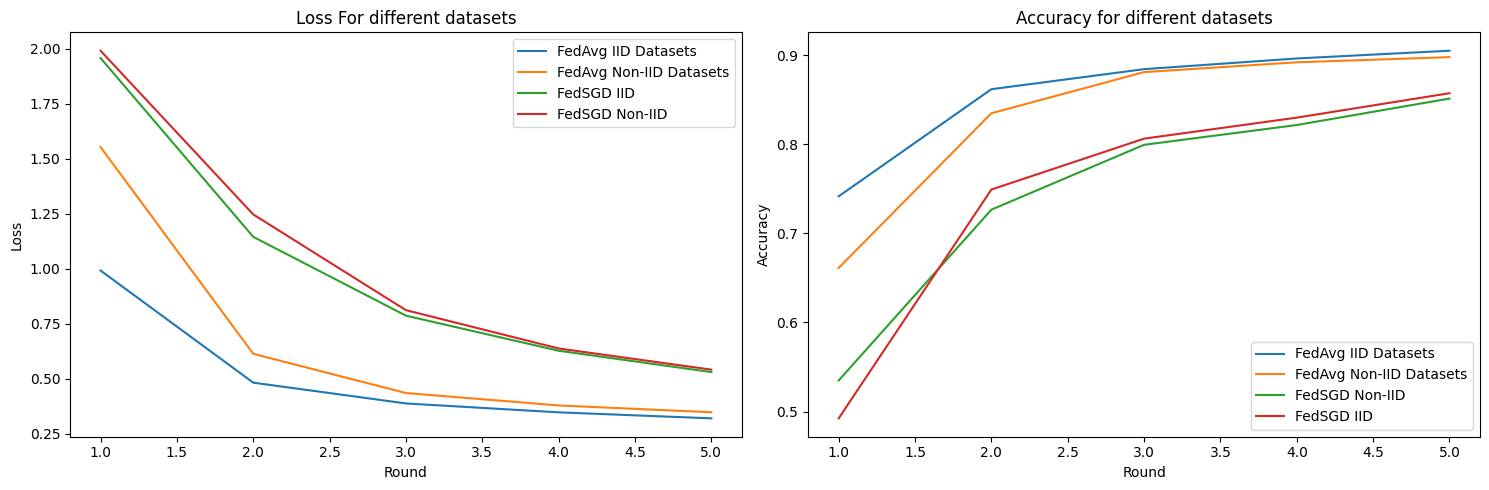

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# ax[0].plot([i for i in range(1, 6)], prox_losses, label = "Prox IID Datasets")
# ax[0].plot([i for i in range(1, 6)], prox_2_losses, label = "Prox Non-IID Datasets")
ax[0].plot([i for i in range(1, 6)], fed_losses, label = "FedAvg IID Datasets")
ax[0].plot([i for i in range(1, 6)], fed_2_losses, label = "FedAvg Non-IID Datasets")
# ax[0].plot([i for i in range(1, 6)], losses, label = "Simple Training")
ax[0].plot([i for i in range(1, 6)], sgd_losses, label = "FedSGD IID")
ax[0].plot([i for i in range(1, 6)], sgd_2_losses, label = "FedSGD Non-IID")



ax[0].set_title("Loss For different datasets")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Loss")

# ax[1].plot([i for i in range(1, 6)], prox_accu, label = "Prox IID Datasets")
# ax[1].plot([i for i in range(1, 6)], prox_2_accu, label = "Prox Non-IID Datasets")
ax[1].plot([i for i in range(1, 6)], fed_accu, label = "FedAvg IID Datasets")
ax[1].plot([i for i in range(1, 6)], fed_2_accu, label = "FedAvg Non-IID Datasets")
# ax[1].plot([i for i in range(1, 6)], accuracies, label = "Simple Training")
ax[1].plot([i for i in range(1, 6)], sgd_2_accu, label = "FedSGD Non-IID")
ax[1].plot([i for i in range(1, 6)], sgd_accu, label = "FedSGD IID")



ax[1].set_title("Accuracy for different datasets")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[0].legend()
plt.tight_layout()